In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# PRACTICE 1 : REGRESSION

## 다음 실습은 Wine(Red wine, White wine)의 여러 특성 변수들과 Wine quality 간 Linear Regression모형을 만들어보고 해석해보는 것이 주 목적입니다. 아래 질문에 답해 주세요 !

In [4]:
df_red = pd.read_csv("red_wine.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
corr_red = df_red.corr()

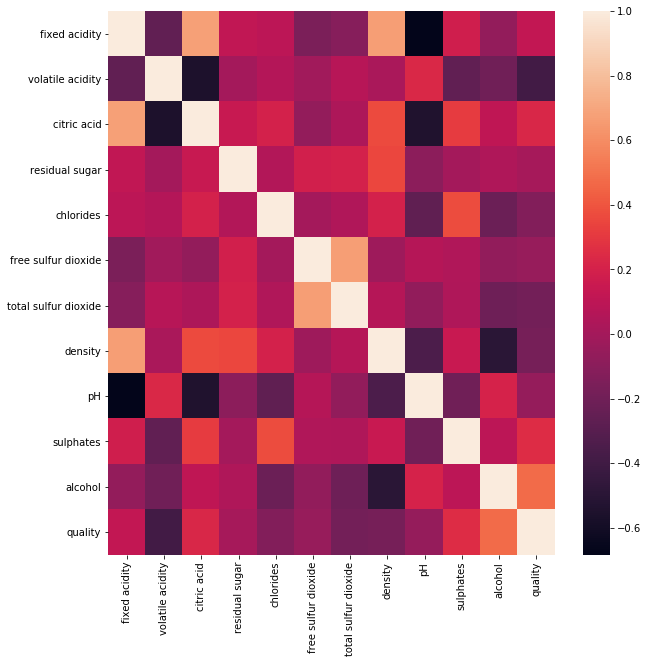

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_red.corr())

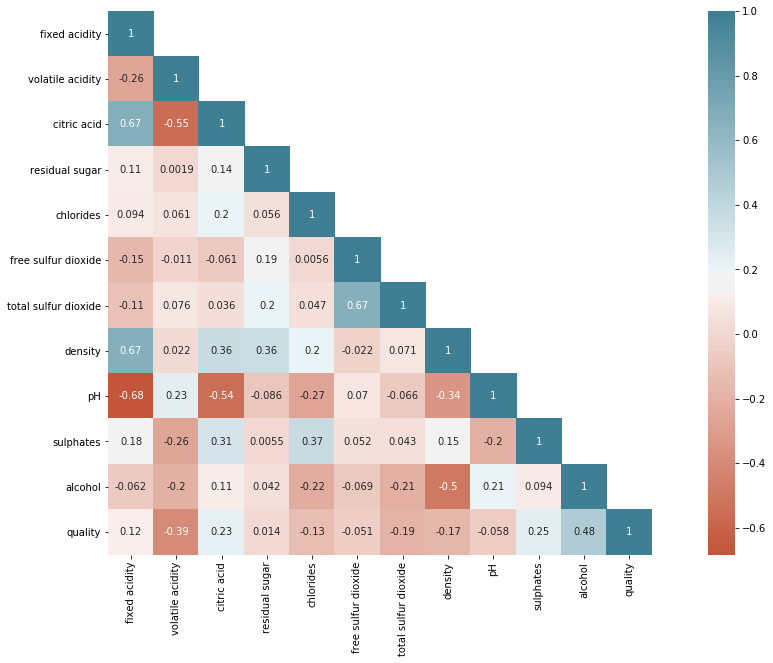

In [7]:
# 히트맵 그리기 
mask = np.array(corr_red)

mask[np.tril_indices_from(mask)] = False # 필요한 반만 보여주기 

# 서브플랏 및 히트맵 
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_red, cmap = sns.diverging_palette(20,220, n =200),
            mask = mask,square = True, annot = True)

In [8]:
# plot 위에 value 표시되도록 함수 만들기
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 8),\
                    textcoords='offset points',fontweight='light',alpha= 1) 

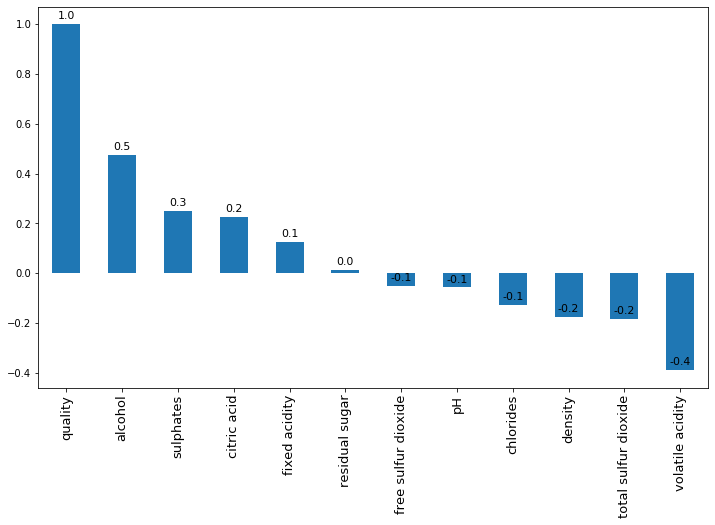

In [9]:
# "price" 와 다른 변수와의 상관계수 
ax1 =  corr_red["quality"].sort_values(ascending = False).plot.bar(figsize = (12,7))
showvalues(ax1)
plt.xticks(fontsize = 13)
plt.show()

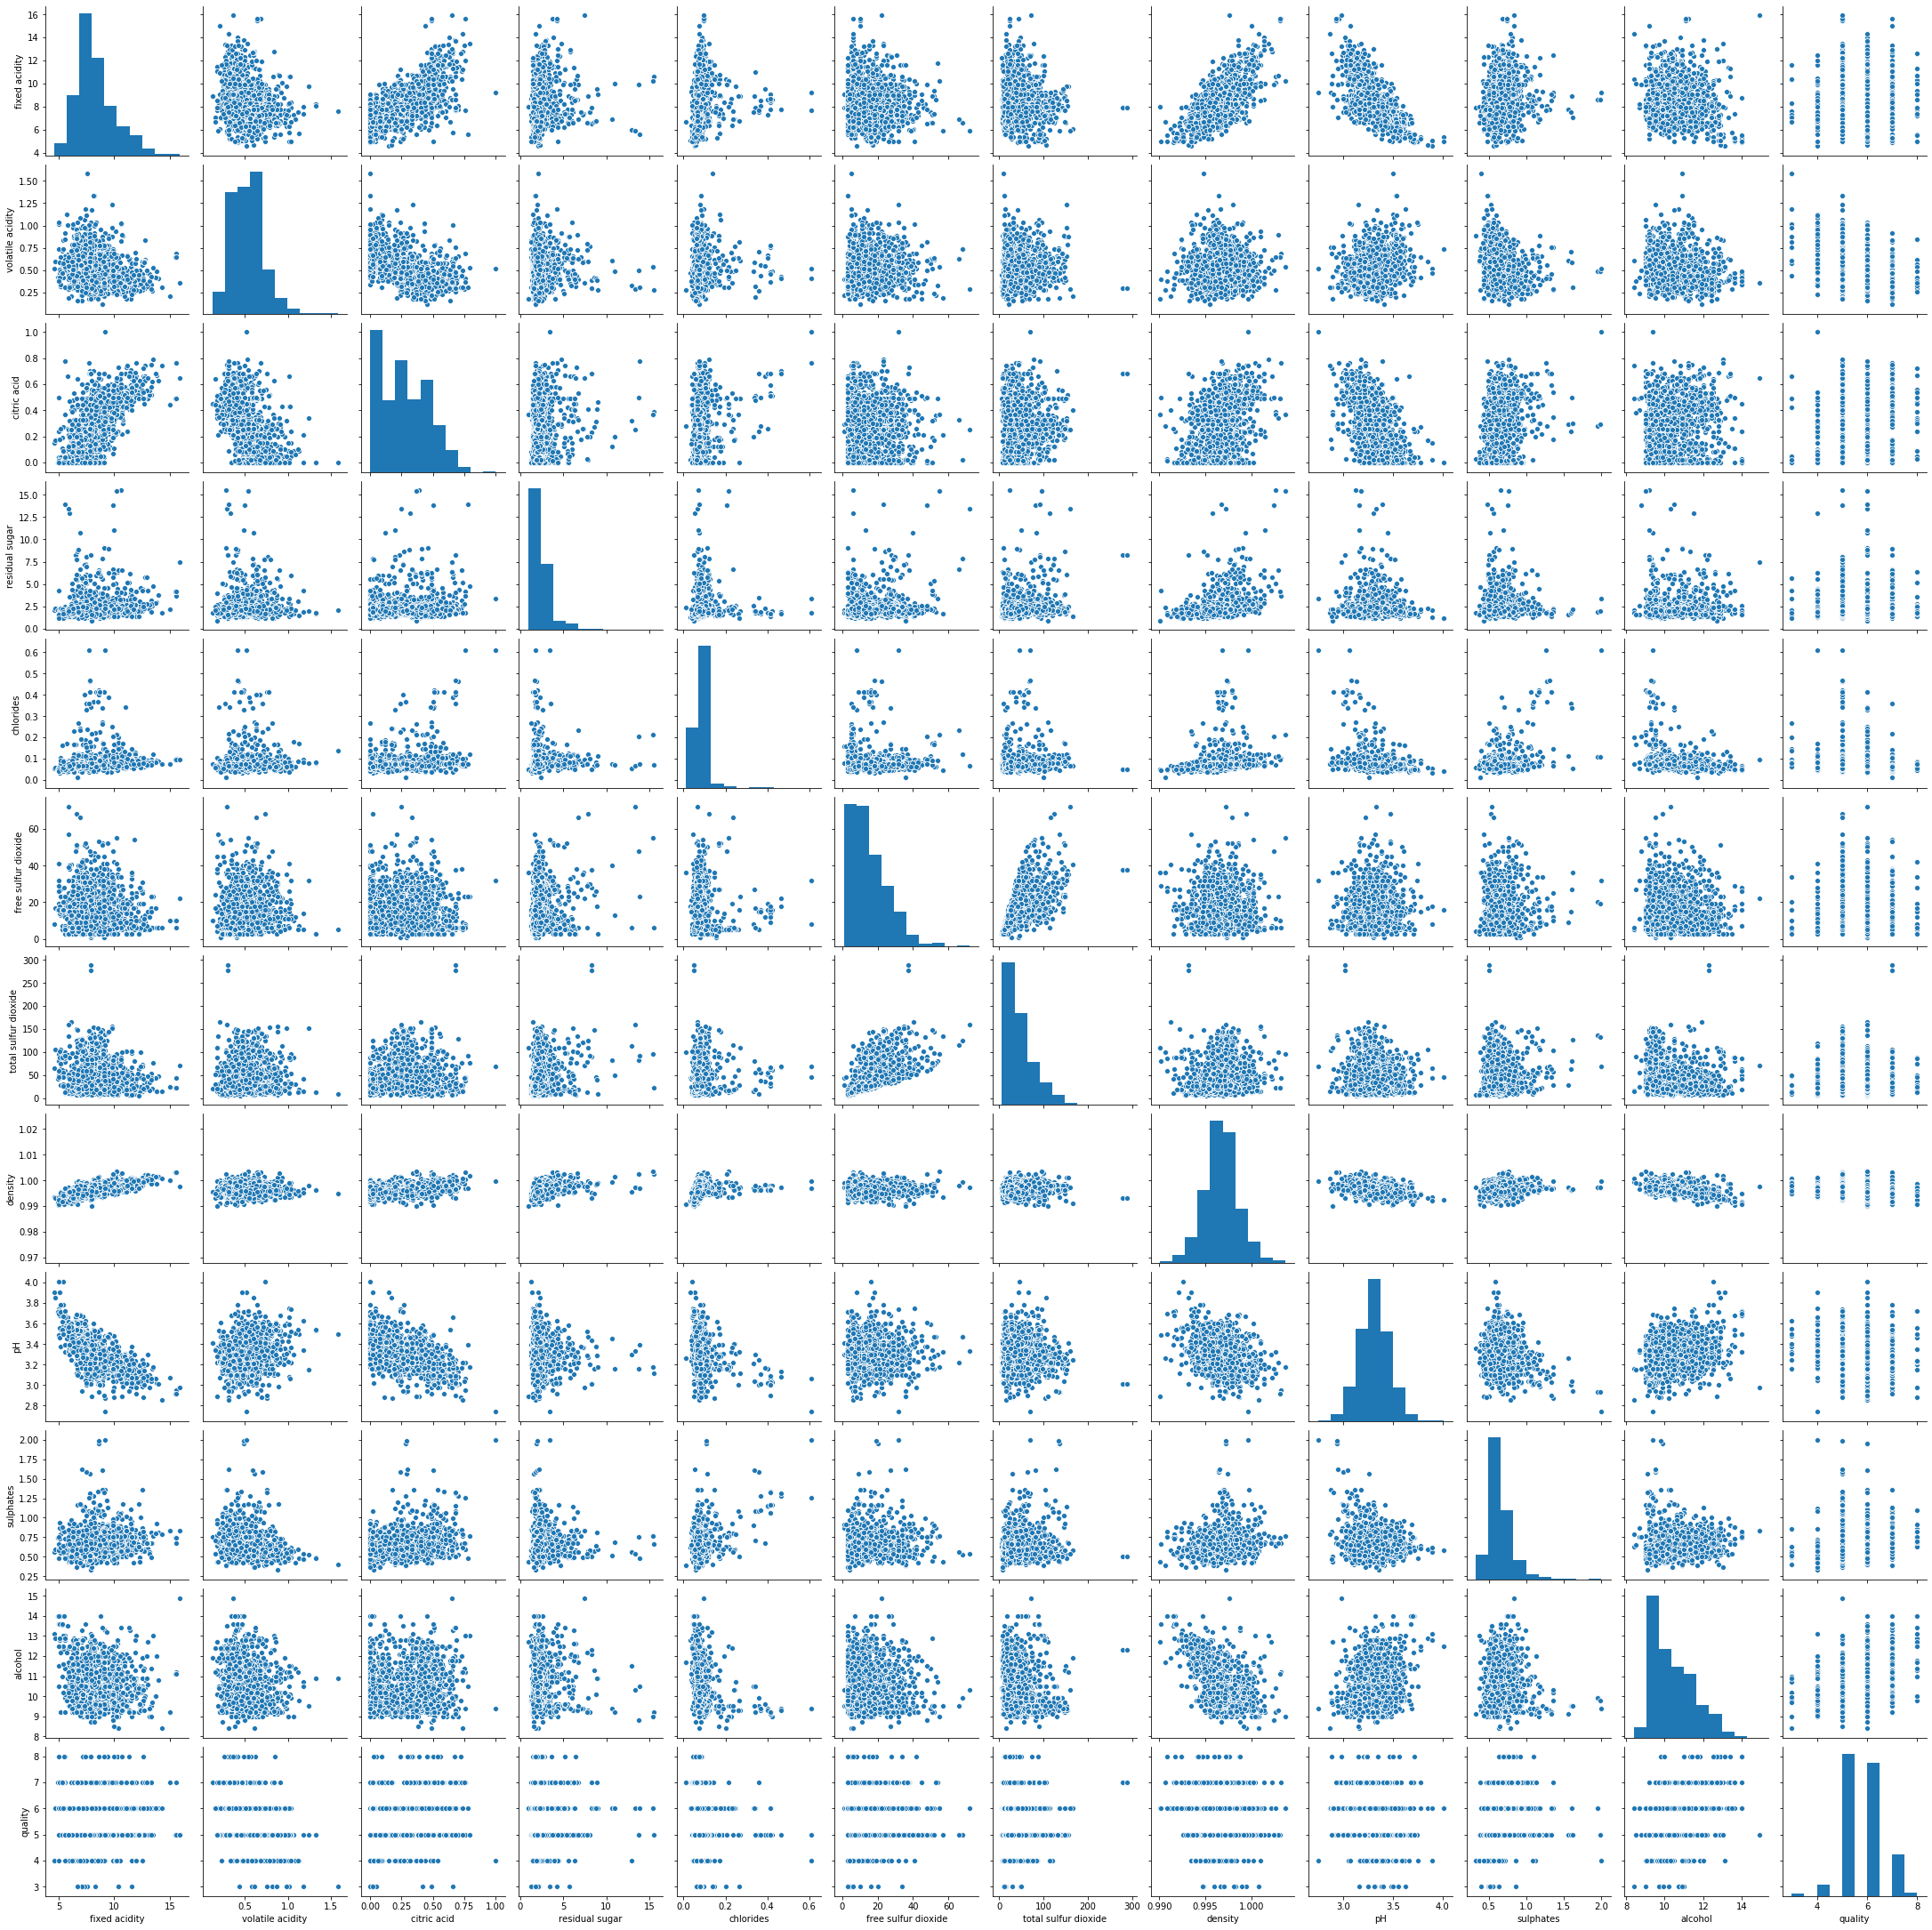

In [10]:
sns.pairplot(df_red)
plt.show()

### R-Square, Sum of squares, F-statistics, p-value 등의 지표를 해석하여 모델을 평가해보시오 !

#### RED WINE DATA : R-Square, Sum of Squares, F-Statistics, p-value

In [11]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
x = df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df_red[["quality"]]

In [13]:
regressor = LinearRegression()
regressor = regressor.fit(x,y)
regressor

LinearRegression()

In [14]:
regressor_r_squre = regressor.score(x, y)
regressor_r_squre

0.3605517030389307

In [15]:
corr_red[["quality"]] >= 0.3

,quality
fixed acidity,False
volatile acidity,False
citric acid,False
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,False


In [16]:
import statsmodels.api as sm
x2 = sm.add_constant(x)

In [17]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
results = sm.OLS(y,x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 11 May 2021   Prob (F-statistic):          1.79e-145
Time:                        19:02:43   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ValueError: x and y must have same first dimension, but have shapes (1,) and (1599,)

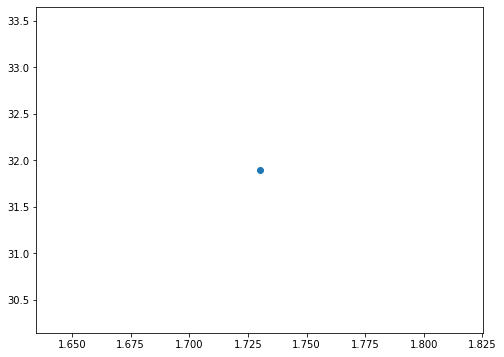

In [186]:

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
#ax.plot(x2, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [18]:
# Red Wine data 의 sum of square 구하기

666.4107003867786

In [132]:
pd.options.display.float_format = '{:.3f}'.format
sum_red = pd.DataFrame(results.pvalues).reset_index()

In [134]:
sum_red.columns = ["variables", "P_value"]

In [135]:
sum_red

,variables,P_value
0,const,0.300
1,fixed acidity,0.336
2,volatile acidity,0.000
3,citric acid,0.215
4,residual sugar,0.276
5,chlorides,0.000
6,free sulfur dioxide,0.045
7,total sulfur dioxide,0.000
8,density,0.409
9,pH,0.031


In [140]:
sum_red["T_value"] = results.tvalues.to_list()

In [143]:
sum_red

,variables,P_value,T_value
0,const,0.300,1.036
1,fixed acidity,0.336,0.963
2,volatile acidity,0.000,-8.948
3,citric acid,0.215,-1.240
4,residual sugar,0.276,1.089
5,chlorides,0.000,-4.470
6,free sulfur dioxide,0.045,2.009
7,total sulfur dioxide,0.000,-4.480
8,density,0.409,-0.827
9,pH,0.031,-2.159


In [147]:
sum_red = sum_red[["variables","T_value", "P_value"]].loc[1:]
sum_red

,variables,T_value,P_value
1,fixed acidity,0.963,0.336
2,volatile acidity,-8.948,0.000
3,citric acid,-1.240,0.215
4,residual sugar,1.089,0.276
5,chlorides,-4.470,0.000
6,free sulfur dioxide,2.009,0.045
7,total sulfur dioxide,-4.480,0.000
8,density,-0.827,0.409
9,pH,-2.159,0.031
10,sulphates,8.014,0.000


In [116]:
for i in range(1,12) : 
    results.params

const                   21.965208
fixed acidity            0.024991
volatile acidity        -1.083590
citric acid             -0.182564
residual sugar           0.016331
chlorides               -1.874225
free sulfur dioxide      0.004361
total sulfur dioxide    -0.003265
density                -17.881164
pH                      -0.413653
sulphates                0.916334
alcohol                  0.276198
dtype: float64

#### WHITE WINE DATA : R-Square, Sum of Squares, F-Statistics, p-value

In [19]:
df_white = pd.read_csv("white_wine.csv")

In [20]:
corr_white = df_white.corr()

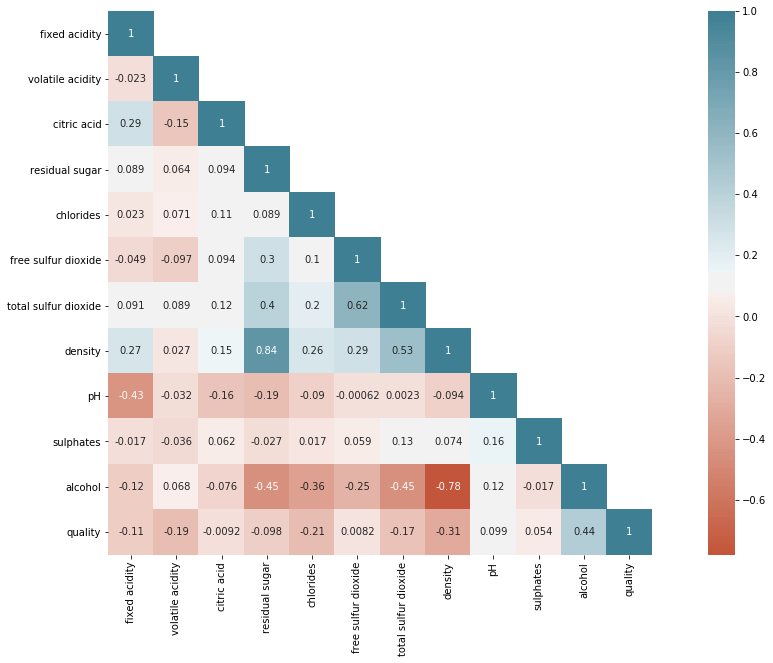

In [21]:
# 히트맵 그리기 
mask = np.array(corr_white)

mask[np.tril_indices_from(mask)] = False # 필요한 반만 보여주기 

# 서브플랏 및 히트맵 
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_white, cmap = sns.diverging_palette(20,220, n =200),
            mask = mask,square = True, annot = True)

In [22]:
# plot 위에 value 표시되도록 함수 만들기
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 8),\
                    textcoords='offset points',fontweight='light',alpha= 1) 

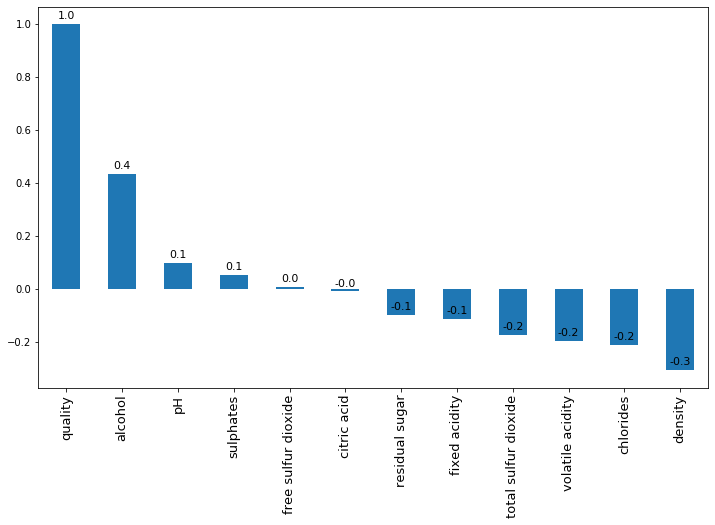

In [23]:
# "quality" 와 다른 변수와의 상관계수 
ax1 =  corr_white["quality"].sort_values(ascending = False).plot.bar(figsize = (12,7))
showvalues(ax1)
plt.xticks(fontsize = 13)
plt.show()

In [24]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [26]:
x_w = df_white[col]

y_w = df_white[["quality"]]

In [151]:
import statsmodels.api as sm
x_2_2 = sm.add_constant(x_w)
results_white = sm.OLS(y_w,x_2_2).fit()
results_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:09   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
pd.options.display.float_format = '{:.3f}'.format
sum_red["WH_T_value"] = results_white.tvalues.to_list()[1:]
sum_red["WH_P_value"] = results_white.pvalues.to_list()[1:]

In [174]:
sum_red.rename(columns = {"T_value" : "RED_T_value", "P_value" : "RED_P_value"})

,variables,RED_T_value,RED_P_value,WH_T_value,WH_P_value
1,fixed acidity,0.963,0.336,3.139,0.002
2,volatile acidity,-8.948,0.000,-16.373,0.000
3,citric acid,-1.240,0.215,0.231,0.818
4,residual sugar,1.089,0.276,10.825,0.000
5,chlorides,-4.470,0.000,-0.452,0.651
6,free sulfur dioxide,2.009,0.045,4.422,0.000
7,total sulfur dioxide,-4.480,0.000,-0.756,0.450
8,density,-0.827,0.409,-7.879,0.000
9,pH,-2.159,0.031,6.513,0.000
10,sulphates,8.014,0.000,6.291,0.000


In [196]:
red_coef = pd.DataFrame(results.params[1:])

In [198]:
red_coef["WH_Coef"]  =   results_white.params[1:]

In [201]:
red_coef = red_coef.rename(columns = {0 : "Red_Coef"})

In [202]:
red_coef

,Red_Coef,WH_Coef
fixed acidity,0.025,0.066
volatile acidity,-1.084,-1.863
citric acid,-0.183,0.022
residual sugar,0.016,0.081
chlorides,-1.874,-0.247
free sulfur dioxide,0.004,0.004
total sulfur dioxide,-0.003,-0.000
density,-17.881,-150.284
pH,-0.414,0.686
sulphates,0.916,0.631


In [28]:
# White Wine data 의 sum of square 구하기
results_white.ssr

2758.328600514566

In [203]:
sns.regplot(results_white)

TypeError: regplot() missing 1 required positional argument: 'y'

#### 각 Red wine과 White wine에서 Wine quality에 가장 큰 영향을 미치는 Wine 특성은 각각 무엇인가? 그 판단 근거를 간략하게 설명하시오.
      * coef 최대값 (레드와인) : -17.8812 (density), coef 최대값 (화이트와인) : -150.2842 (density)
      * 레드와인과 화이트 와인의 변수별 coefficient 를 확인하면 변수 Density 의 coefficient 가 가장 크기 때문에 Wine Quality 에 가장  큰 영향을 미치는 변수라고 말할 수 있다. 
  

In [29]:
red_coef = pd.DataFrame(regressor.coef_)

In [30]:
regressor.coef_

array([[ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,
         1.63312698e-02, -1.87422516e+00,  4.36133331e-03,
        -3.26457970e-03, -1.78811638e+01, -4.13653144e-01,
         9.16334413e-01,  2.76197699e-01]])

In [31]:
df_red.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [32]:
red_coef

,0,1,2,3,4,5,6,7,8,9,10
0,0.024991,-1.08359,-0.182564,0.016331,-1.874225,0.004361,-0.003265,-17.881164,-0.413653,0.916334,0.276198


In [33]:
red_coef.columns = [['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [34]:
red_coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.024991,-1.08359,-0.182564,0.016331,-1.874225,0.004361,-0.003265,-17.881164,-0.413653,0.916334,0.276198


In [35]:
df_white["density"].min()

0.98711

In [36]:
df_red["density"].min()

0.9900700000000001

In [37]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


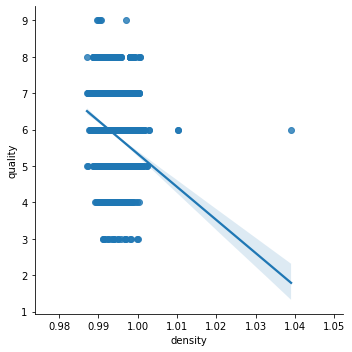

In [38]:
# white wine : linear regression 
sns.lmplot(data = df_white, x = "density", y = "quality")

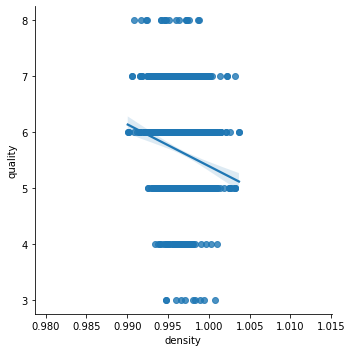

In [39]:
# red wine : linear regression 
sns.lmplot(data = df_red, x = "density", y = "quality")

### Red wine 과 White wine 데이터 두 개를 하나로 묶어서 Linear Regression 분석을 시행하시오. Wine type을 red (1) 와 white (0)으로 나누고 Dummy code를 부여해서 분석하고 1.1의 질문에 다시 답하시오. (1.1 질문 (2)에서는 Red wine, White wine 구분 없이 답하시오.)

#### Dummy code를 부여하고 데이터 머지 : Wine type을 red (1) 와 white (0) 을 할당한 새로운 변수 생성 및 outer join 으로 concat

In [40]:
# 레드와인 데이터에 wine type 이라는 새로운 변수를 만들고 더미코드 1 부여 
df_red["wine_type"] = 1

In [41]:
# 화이트와인 데이터에 wine type 이라는 새로운 변수를 만들고 더미코드 0 부여 
df_white["wine_type"] = 0

In [42]:
# 레드와인데이터와 화이트와인 데이터를 행을 기준으로 합치기
wine_total =pd.concat([df_red, df_white], join = "outer", axis =0)

In [43]:
# 인덱스 번호 다시 리셋
wine_total = wine_total.reset_index(drop = True)

In [44]:
# 머지 데이터 보기 
wine_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


#### 통합 와인 데이터의 리그레션 분석

In [45]:
wine_total.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [46]:
# 입력변수와 목표변수 나누기 
total_x = wine_total[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type']]
total_y = wine_total["quality"]

In [47]:
import statsmodels.api as sm
total_x1 = sm.add_constant(total_x) # y 절편 입력
results_total = sm.OLS(total_y,total_x1).fit()
results_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        19:02:45   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.3904     14.105      7.401      0.000      76.741     132.040
fixed acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
residual sugar           0.0624      0.006     10.522      0.000       0.051       0.074
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
free sulfur dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total sulfur dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
wine_type                0.3613      0.057      6.367      0.000       0.250       0.473
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
# 통합 데이터의 sum of square
results_total.ssr

3484.746235950572

### Intercept 제거한 리그레션 분석 : 분석을 다시 하는데 intercept 를 넣지 않고 regression 을 돌렸을 때 어떤 결과가 나왔는지 비교하고 결과의 차이가 나는 이유를 자유롭게 서술하시오

In [49]:
# 입력변수, 목표변수 나누기
total_x_no_constant = wine_total[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type']]
total_y_no_constant = wine_total["quality"]

In [50]:
# 모델돌리기, 절편 입력 하지 않음 
import statsmodels.api as sm
results_total_noconstant = sm.OLS(total_y_no_constant,total_x_no_constant).fit()
results_total_noconstant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.405e+04
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        19:02:45   Log-Likelihood:                         -7222.5
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6485   BIC:                                  1.455e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0022      0.011     -0.207      0.836      -0.023       0.018
volatile acidity        -1.5601      0.081    -19.220      0.000      -1.719      -1.401
citric acid             -0.0976      0.080     -1.222      0.222      -0.254       0.059
residual sugar           0.0222      0.002      9.294      0.000       0.018       0.027
chlorides               -0.9976      0.334     -2.985      0.003      -1.653      -0.342
free sulfur dioxide      0.0056      0.001      7.355      0.000       0.004       0.007
total sulfur dioxide    -0.0018      0.000     -5.487      0.000      -0.002      -0.001
density                  2.1699      0.295      7.364      0.000       1.592       2.748
pH                       0.0972      0.073      1.334      0.182      -0.046       0.240
sulphates                0.5824      0.074      7.850      0.000       0.437       0.728
alcohol                  0.3383      0.009     37.061      0.000       0.320       0.356
wine_type                0.1339      0.048      2.794      0.005       0.040       0.228
==============================================================================
Omnibus:                      138.144   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.042
Skew:                           0.023   Prob(JB):                     9.51e-67
Kurtosis:                       4.059   Cond. No.                     5.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
# y 절편 입력하지 않은 통합 데이터의 sum of square 
results_total_noconstant.ssr

3514.1850341381914

### Linear Regression으로 예측모형을 만들어보고, 모델에 대한 성과평가를 해보시오 (회귀분석에서 모델의 성능평가에 쓰이는 대표적인 지표는?), Cross validation은 모델 평가에 어떻게 활용되는지 자유롭게 기술하시오

    * MSE (Mean Squared Error) : 오차 제곱합을 전체 건수로 나눈 평균. 
    * RMSE (Root Mean Squared Error) : MSE 의 양의 제곱근. 오차와 척도를 맞춘 것.
    * MAE (Mean Absolute Error) : 오차의 절대값을 더한 후 건수로 나눈 평균
    * MAPE (Mean Absolute Percentage Error) : 오차의 절대값을 실제값으로 나눈 비율의 평균
    * 교차 검증은 보이지 않는 데이터에 대한 머신 러닝 모델의 기술을 추정하기 위해 주로 응용 머신 러닝에 사용된다. 즉, 모델 훈련 중에 사용되지 않는 데이터에 대한 예측을 위해 사용될 때 모형이 일반적으로 어떻게 수행될 것으로 예상되는지를 추정하기 위해 제한된 표본을 사용한다.이 방법은 이해하기 쉽고 일반적으로 단순한 열차/시험 분할과 같은 다른 방법보다 덜 편향되거나 덜 낙관적인 모델 스킬의 추정치를 얻기 때문에 널리 사용되는 방법이다.

#### linear Regression : 훈련셋, 시험셋 나누기

In [52]:
# 시험셋, 훈련셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size=0.33, random_state=42)

#### Linear Regression : 시험셋으로 예측모델 적합

In [53]:
# 시험셋으로예측모델 적합
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
total_model = linreg.fit(X_train,y_train)
total_model

LinearRegression(normalize=True)

#### Linear Regression : 훈련셋으로 적합된 선형회기 모델에 시험셋을 넣고 예측 데이터 출력 

In [54]:
y_pred = total_model.predict(X_test)
y_pred

array([6.72463556, 5.13691494, 6.29842717, ..., 5.75557741, 5.46975944,
       5.6312513 ])

#### Linear Regression : 실제값과 예측값 시각화

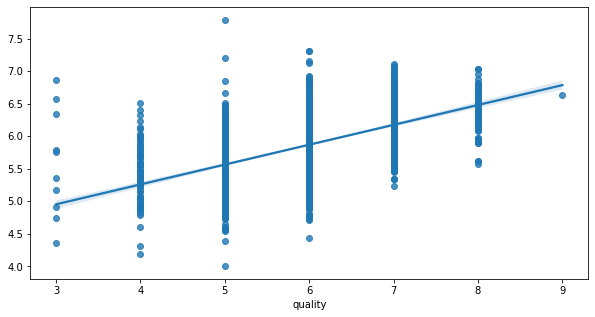

In [55]:
# 실제값 예측값 시각화 
plt.figure(figsize = (10,5))
sns.regplot(x = y_test, y = y_pred)

#### Linear Regression : 실제값, 예측값 RMSE 확인을 통한 성능 평가

In [56]:
# RMSE 구하는 사용자 정의 함수 만들기
from sklearn.metrics import mean_squared_error

def rmse_eval(y, y_pred) :
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
# RMSE 확인 
lg_rmse = rmse_eval( y_test, y_pred)
lg_rmse 

0.7298047235712019

### Cross Validation : 모델링 및 성능 평가

#### Cross Validation : 앞서 linear regression model 에 대한 교차검증 스코어 구하기

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(total_model, X_train, y_train, cv=5, n_jobs=-1)

array([0.30565137, 0.3075416 , 0.30543889, 0.25226792, 0.33072717])

#### Cross Validation : 앞선 모델의 교차검증 예측값 구하기

In [59]:
from sklearn.model_selection import cross_val_predict

y_pred_val = cross_val_predict(total_model, X_train, y_train, cv=5, n_jobs=-1)
y_pred_val

array([6.0227767 , 6.10930351, 6.20486166, ..., 5.37222337, 5.54433522,
       5.0727546 ])

#### Cross  Validation : RMSE 확인을 통한 성능 평가

In [60]:
# RMSE

error = (y_train - y_pred_val)
mse = (error ** 2).mean()
cv_rmse = np.sqrt(mse)
cv_rmse

0.7363224743941865

#### K-FOLD Cross Validation : Fold 나누기

In [61]:
from sklearn.model_selection import KFold

KFold(5)

KFold(n_splits=5, random_state=None, shuffle=False)

#### K-FOLD 교차검증 RMSE 확인 :  사용자 정의 함수 활용

In [62]:
#Validation function
n_folds = 5

def rmsle_cv(total_model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(total_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [63]:
# K-Fold RMSE
K_fold_rmse = rmsle_cv(total_model).mean()
K_fold_rmse

0.7355606745930425

### Lasso Linear Regression : 모델링 및 성능 평가 

#### Lasso Linear Regression : 앞서 나눈 훈련셋으로 모델 적합

In [64]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [213]:
# lasso 모델 적합
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha= 0.0001,normalize=True, max_iter=1e5)
lassoreg_model = lassoreg.fit(X_train,y_train)
#lasso = Lasso(alpha =0.0005, random_state=1)
score_lasso = rmsle_cv(lassoreg_model)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score_lasso.mean(), score_lasso.std())) #훈련셋으로 성능 확인 


Lasso score: 0.7373 (0.0354)



RMSE :  0.7298047235712021 alpha :  1e-15


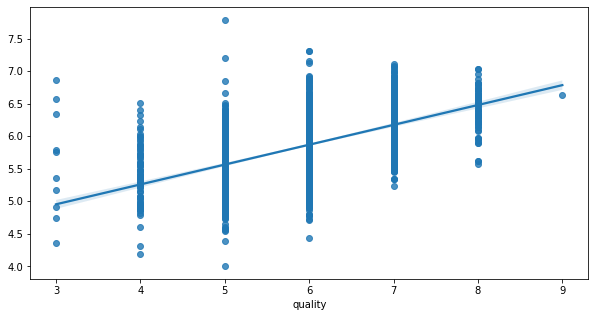

RMSE :  0.7298047235666868 alpha :  1e-10


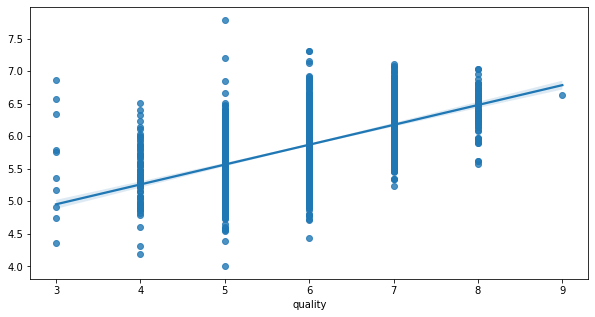

RMSE :  0.7298047231196649 alpha :  1e-08


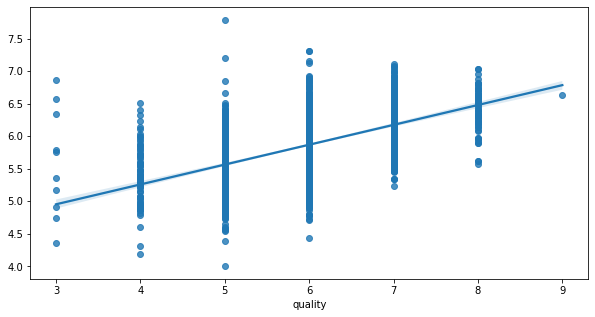

RMSE :  0.7298002387619947 alpha :  0.0001


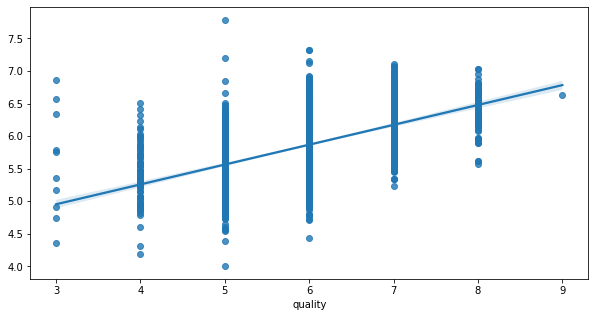

RMSE :  0.7297624416455933 alpha :  0.001


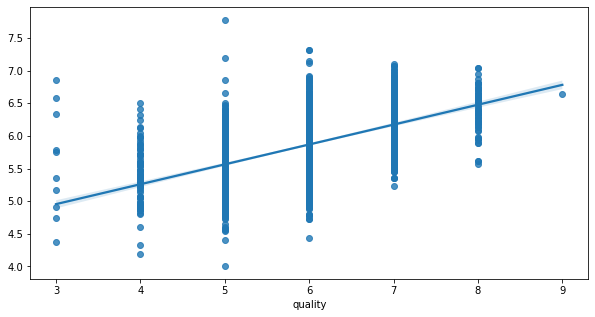

RMSE :  0.7295271277891385 alpha :  0.01


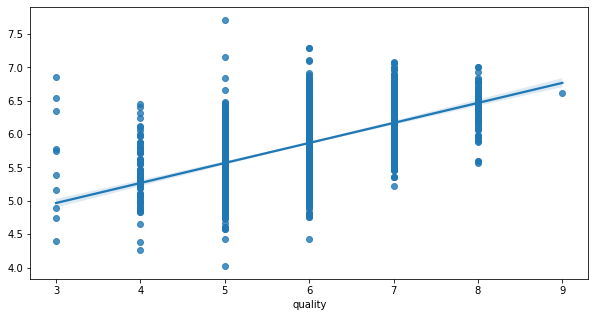

RMSE :  0.7571639679993925 alpha :  1


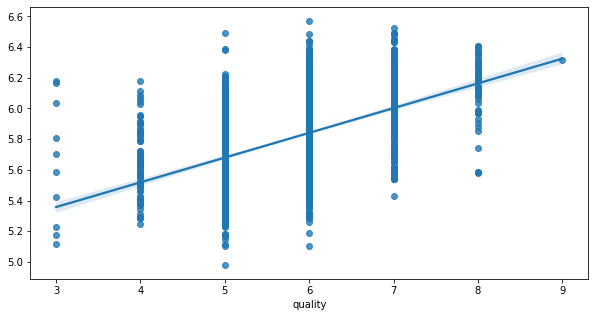

RMSE :  0.8102014974069282 alpha :  5


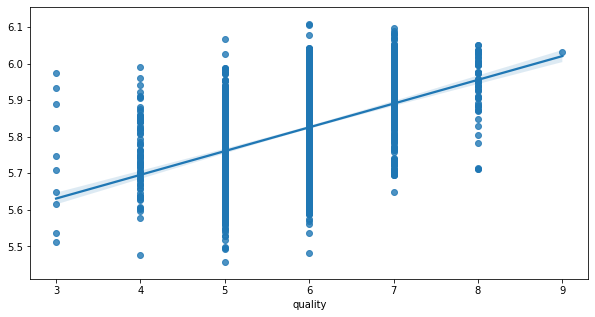

RMSE :  0.8294345658604185 alpha :  10


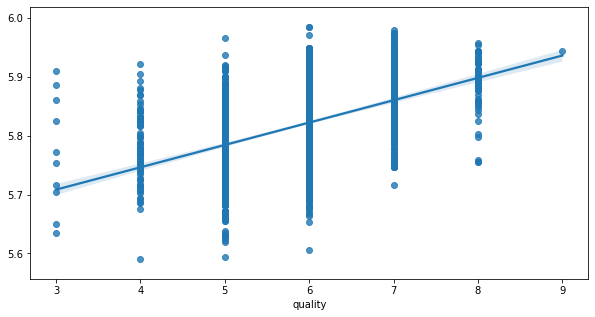

RMSE :  0.8426742624035372 alpha :  20


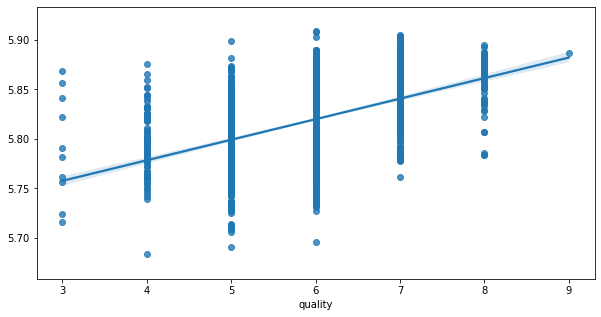

In [258]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge_rmse = []
for i in alpha_ridge : 
    Ridge_2 = Ridge(alpha = i ,normalize=True, max_iter=1e5)
    Ridge_2_model = Ridge_2.fit(X_train,y_train) 
    y_pred_ = Ridge_2_model.predict(X_test)
    ridge_rmse_ = rmse_eval( y_test, y_pred_)
    plt.figure(figsize = (10,5))
    print("RMSE : ", ridge_rmse_, "alpha : ", i)
    ridge_ = sns.regplot(x = y_test, y = y_pred_)
    ridge_rmse.append(ridge_rmse_)
    
    showvalues(lasso_)
    plt.show()
    

In [260]:
ridge_rmse

[0.7298047235712021,
 0.7298047235666868,
 0.7298047231196649,
 0.7298002387619947,
 0.7297624416455933,
 0.7295271277891385,
 0.7571639679993925,
 0.8102014974069282,
 0.8294345658604185,
 0.8426742624035372]

RMSE :  0.7298047235711903 alpha :  1e-15


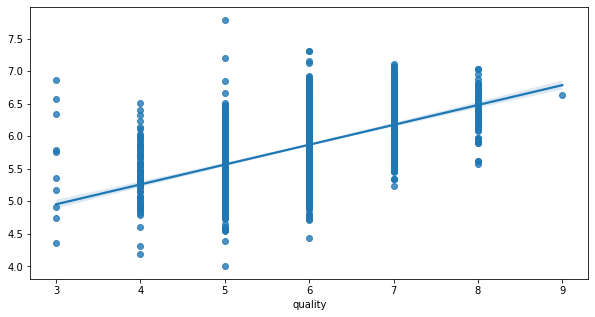

RMSE :  0.7298047224080338 alpha :  1e-10


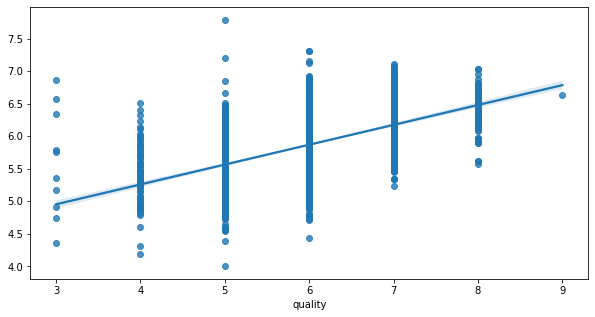

RMSE :  0.7298046072736558 alpha :  1e-08


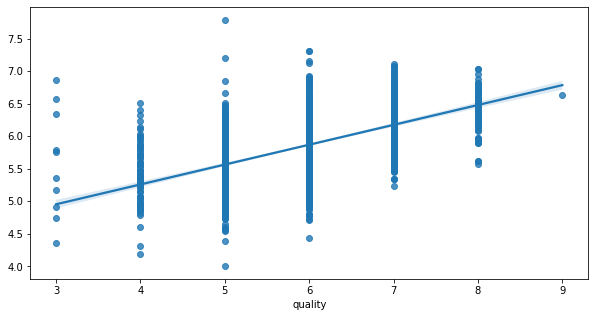

RMSE :  0.731356279967831 alpha :  0.0001


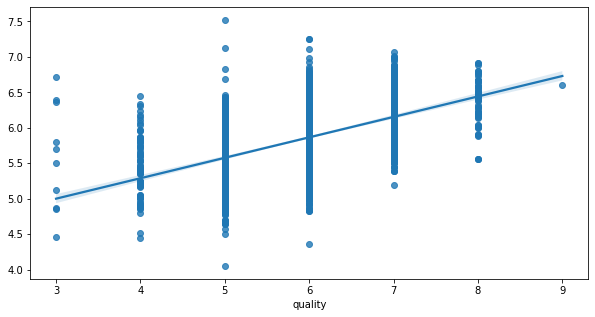

RMSE :  0.7436181448807475 alpha :  0.001


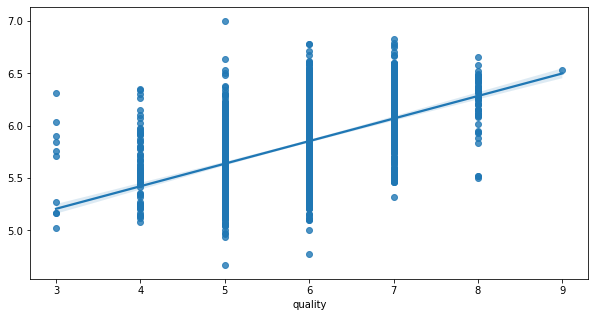

RMSE :  0.8598582928699822 alpha :  0.01


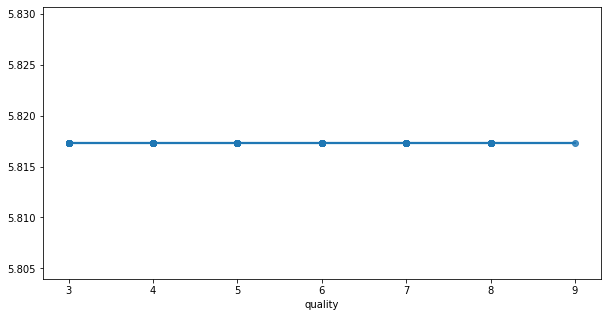

RMSE :  0.8598582928699822 alpha :  1


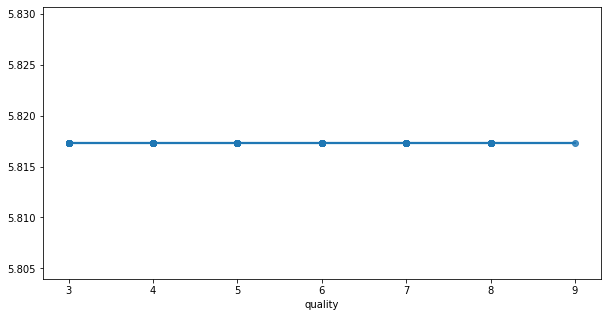

RMSE :  0.8598582928699822 alpha :  5


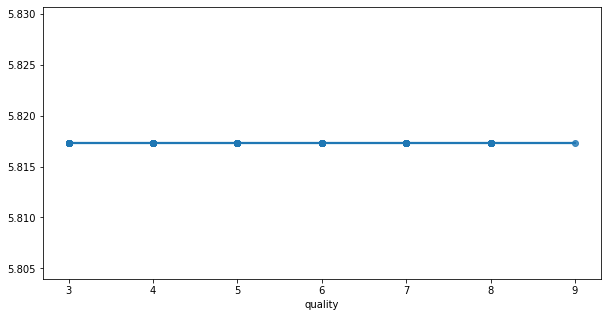

RMSE :  0.8598582928699822 alpha :  10


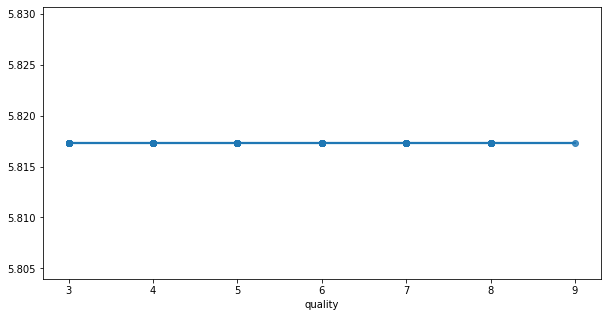

RMSE :  0.8598582928699822 alpha :  20


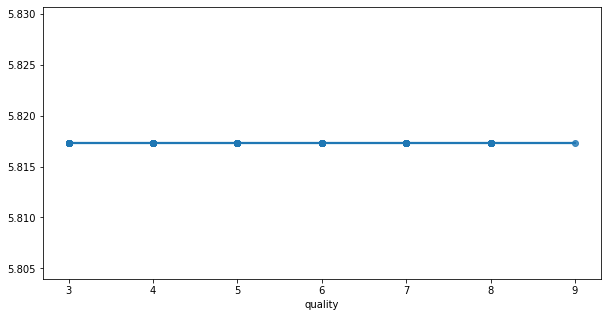

In [261]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

lasso_rmse = []
for i in alpha_ridge : 
    lss_2 = Lasso(alpha = i ,normalize=True, max_iter=1e5)
    lss_2_model = lss_2.fit(X_train,y_train) 
    y_pred_lss = lss_2_model.predict(X_test)
    ridge_rmse_lss = rmse_eval( y_test, y_pred_lss)
    plt.figure(figsize = (10,5))
    print("RMSE : ", ridge_rmse_lss, "alpha : ", i)
    ridge_ = sns.regplot(x = y_test, y = y_pred_lss)
    lasso_rmse.append(ridge_rmse_lss)
    
    showvalues(lasso_)
    plt.show()
    

In [262]:
lasso_rmse

[0.7298047235711903,
 0.7298047224080338,
 0.7298046072736558,
 0.731356279967831,
 0.7436181448807475,
 0.8598582928699822,
 0.8598582928699822,
 0.8598582928699822,
 0.8598582928699822,
 0.8598582928699822]

In [266]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ls_dic = {}
lasso_coef = []
for i in alpha_ridge : 
    lss_2 = Lasso(alpha = i ,normalize=True, max_iter=1e5)
    lss_2_model = lss_2.fit(total_x, total_y) 
    lss_c = lss_2_model.coef_
    lasso_coef.append(lss_c)


#### Lasso Regression : 테스트셋으로 예측값 구하기

In [214]:
# lasso 모델로 예측 
y_pred_lasso = lassoreg_model.predict(X_test)

#### Lasso Regression : 실제값, 예측값 시각화 

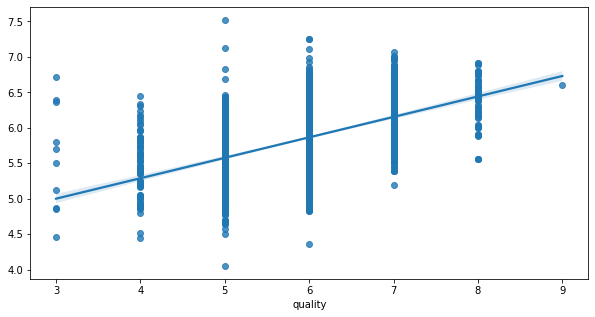

In [215]:
# lasso 모델 예측값 실제값 차이 그래프 
plt.figure(figsize = (10,5))
sns.regplot(x = y_test, y = y_pred_lasso)

#### Lasso Regression : RMSE 확인을 통한 성능 평가

In [216]:
# lasso 모델 RMSE 확인 
lasso_rmse = rmse_eval( y_test, y_pred_lasso)
lasso_rmse

0.731356279967831

In [218]:
lassoreg_model.coef_

array([ 0.00000000e+00, -1.46435045e+00, -7.57128283e-03,  2.69724156e-02,
       -3.31781578e-01,  5.11740894e-03, -1.71620297e-03, -1.09032388e+01,
        7.50339780e-02,  6.43710957e-01,  3.24870426e-01,  1.01655208e-01])

In [71]:
# 그냥 참고용
#from sklearn.kernel_ridge import KernelRidge
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#score_ridge = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score_ridge.mean(), score_ridge.std()))

In [72]:
#rmsle_cv(KRR).mean()

### Ridge Linear Regression : 모델링 및 성능 평가

#### Ridge Linear Regression : 훈련셋으로 모델 적합

In [73]:
# Ridge Linear Regression 모델 적합 후, 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridgereg = Ridge(alpha= 1e-15,normalize=True)
ridge_model = ridgereg.fit(X_train,y_train)
score_ridge_cv = rmsle_cv(ridge_model)
# 훈련셋으로 먼저 성능 확인 
print("Ridge score_cv : {:.4f} ({:.4f})\n".format(score_ridge_cv.mean(), score_ridge_cv.std()))

Ridge score_cv : 0.7356 (0.0335)



#### Ridge Linear Regression : 시험셋으로 예측값 구하기 

In [74]:
y_pred_ridge = ridge_model.predict(X_test)

#### Ridge Linear Regression : 실제값, 예측값 시각화 

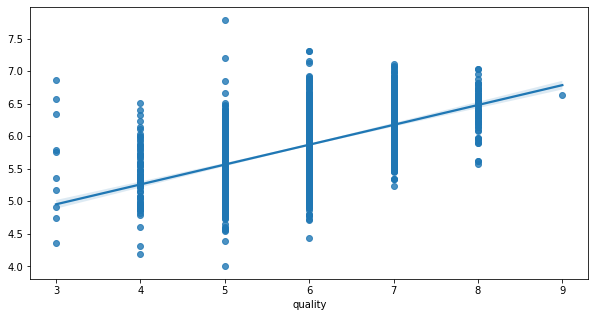

In [75]:
plt.figure(figsize = (10,5))
sns.regplot(x = y_test, y = y_pred_ridge)

#### Ridge Linear Regression : RMSE 확인을 통한 성능평가

In [76]:
# RMSE 확인 
ridge_rmse = rmse_eval( y_test, y_pred_ridge)
ridge_rmse

0.7298047235712021

### Linear Regression 별 RMSE 데이터프레임화

In [77]:
# 모형 순서 별 이름 리스트로 묶기
models = ["linear Reg", "CV", "K-FOLD CV", "LASSO", "RIDGE"]

In [78]:
# 모형 순서 별 RMSE 리스트로 묶기
values = [round(lg_rmse,4),round(cv_rmse, 4), round(K_fold_rmse, 4),round(lasso_rmse,4), round(ridge_rmse, 4)]

In [79]:
# 데이터프레임 만들기
df_reg = pd.DataFrame({"Reg_Type" : models, "RMSE" : values})
df_reg

,Reg_Type,RMSE
0,linear Reg,0.7298
1,CV,0.7363
2,K-FOLD CV,0.7356
3,LASSO,0.7314
4,RIDGE,0.7298


In [80]:
# "RMSE"에 따라 오름차순 정렬 
df_reg = df_reg.sort_values(by = "RMSE").reset_index(drop = True)
df_reg

,Reg_Type,RMSE
0,linear Reg,0.7298
1,RIDGE,0.7298
2,LASSO,0.7314
3,K-FOLD CV,0.7356
4,CV,0.7363


## 참고용 : Ridge Regression 파라미터 최적화 - 람다값에 따른 평가

In [81]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha= 1e-10,normalize=True)
rmsle_cv(ridgereg).mean()

0.7355606745846186

# PRACTICE 2 : QUANTILE REGRESSION

## 다음 실습은 Boston Housing price 데이터를 활용하여, 실제로 Quantile regression을 실행하보며 해당 개념을 숙지하는 것이 주목적 입니다. 아래 질문에 답해 주세요

In [82]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df_house = pd.read_excel("Boston_Housing_Price.xlsx")
df_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7


In [84]:
house_col = df_house.columns[:-1].to_list()
house_col

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

### 위 데이터에서, 집 값 (medv)에 변수 (lstat, rm, crim, dis)가 미치는 영향력을 Linear  Regression으로 측정해보고 모델을 해석해보시오

In [85]:
house_x = df_house[house_col]
house_y = df_house[["medv"]]

In [206]:
import statsmodels.api as sm
house_x2 = sm.add_constant(house_x) # y 절편 입력
ols_house = sm.OLS(house_y,house_x2).fit()
ols_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     91.00
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.48e-109
Time:                        00:35:22   Log-Likelihood:                -1171.3
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7400      5.347      6.310      0.000      23.227      44.253
crim          -0.1166      0.032     -3.614      0.000      -0.180      -0.053
zn             0.0398      0.016      2.569      0.011       0.009       0.070
indus          0.0130      0.065      0.199      0.842      -0.115       0.141
chas           1.6123      0.906      1.779      0.076      -0.170       3.394
nox          -15.2380      3.930     -3.878      0.000     -22.964      -7.512
rm             3.9892      0.444      8.986      0.000       3.116       4.862
age           -0.0043      0.014     -0.313      0.754      -0.031       0.023
dis           -1.3351      0.207     -6.434      0.000      -1.743      -0.927
rad            0.2752      0.071      3.856      0.000       0.135       0.416
tax           -0.0129      0.004     -3.192      0.002      -0.021      -0.005
ptratio       -0.9161      0.139     -6.567      0.000      -1.190      -0.642
black          0.0084      0.003      3.014      0.003       0.003       0.014
lstat         -0.5112      0.054     -9.437      0.000      -0.618      -0.405
==============================================================================
Omnibus:                      146.241   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.483
Skew:                           1.546   Prob(JB):                    1.84e-135
Kurtosis:                       8.225   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
ols_house.ssr

7802.810509145553

* 결론 : 변수 "rm" 이 목표변수 "medv"에 대해 가장 큰 coef 를 가지기 때문에 가장 큰 영향력이 있는 변수 이다.

### 위 분석을 다시 Quantile Regression (5%, 50%, 95%, 99% percentile) 으로 측정해보고 각 변수들의 계수 값을 해석해보고, 2.2의 결과와 어떻게 다른지 자유롭게 설명하고 해석해보시오.

#### Quantile Regression : 

In [87]:
for i in [0.05, 0.5, 0.95, 0.99] :
    mod_3 = smf.quantreg('house_y ~ house_x', df_house)
    res_3 = mod_3.fit(q= i)
    print("Quantile :", i*100,"%", "Sum of Square :", round(res_3.ssr,5),"\n\n", res_3.summary(),"\n")

Quantile : 5.0 % Sum of Square : 20664.15549 

                          QuantReg Regression Results                          
Dep. Variable:                house_y   Pseudo R-squared:               0.6104
Model:                       QuantReg   Bandwidth:                       2.315
Method:                 Least Squares   Sparsity:                        13.90
Date:                Tue, 11 May 2021   No. Observations:                  404
Time:                        19:05:17   Df Residuals:                      390
                                        Df Model:                           13
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.1367      5.053      4.777      0.000      14.202      34.071
house_x[0]     -0.0627      0.013     -4.807      0.000      -0.088      -0.037
house_x[1]      0.0276      0.013      2.167      0.031       0.003       0.053

In [88]:
[0.05, res_3.params['Intercept'], res_3.params['house_x[0]']] + \
            res_3.conf_int().loc['house_x[0]'].tolist()

[0.05,
 18.606259665451944,
 -0.40792431685247266,
 -0.46703278377157215,
 -0.34881584993337317]

In [89]:
res_3.conf_int().loc["house_x[0]"]

0   -0.467033
1   -0.348816
Name: house_x[0], dtype: float64

In [90]:
'crim'
'zn'
'indus'
'chas'
'nox'
'rm'
'age'
'dis'
'rad'
'tax'
'ptratio'
'black'
'lstat'

'lstat'

In [93]:
quantiles = [0.05, 0.5, 0.95, 0.99]
def fit_model(q):
    res_4 = mod_3.fit(q=q)
    
    for i in range(0,5) :
        return [q, res_4.params['Intercept'], res_4.params['house_x']] + \
    res_4.conf_int().loc['house_x'].tolist()

In [94]:
quantiles = [0.05, 0.5, 0.95, 0.99]
def fit_model(q):
    res_4 = mod_3.fit(q=q)
    
    for i in res_4.params.index.to_list()[1:] : 
        
        return [i, q, res_4.params['Intercept'], res_4.params[i]] + \
            res_4.conf_int().loc[i].tolist()
["lstat", "rm", "crim", "dis"]

['lstat', 'rm', 'crim', 'dis']

In [95]:
quantiles = [0.05, 0.5, 0.95, 0.99]
q = []
intercept = []
coef_crim = []
coef_zn = []
coef_indus = []
coef_chas = []
coef_nox = []
coef_rm = []
coef_age = []
coef_dis = []
coef_rad = []
coef_tax = []
coef_ptratio = []
coef_black = []
coef_lstat = []

lb_crim = []
lb_zn = []
lb_indus = []
lb_chas = []
lb_nox = []
lb_rm = []
lb_age = []
lb_dis = []
lb_rad = []
lb_tax = []
lb_ptratio = []
lb_black = []
lb_lstat = []


ub_crim = []
ub_zn = []
ub_indus = []
ub_chas = []
ub_nox = []
ub_rm = []
ub_age = []
ub_dis = []
ub_rad = []
ub_tax = []
ub_ptratio = []
ub_black = []
ub_lstat = []

for i in quantiles : 
    res_4 = mod_3.fit(q=i)
    
    q1 = i
    inter = round(res_4.params[0],5)
    coef_1 = round(res_4.params[1],5)
    coef_2 = round(res_4.params[2],5)
    coef_3 = round(res_4.params[3],5)
    coef_4 = round(res_4.params[4],5)
    coef_5 = round(res_4.params[5],5)
    coef_6 = round(res_4.params[6],5)
    coef_7 = round(res_4.params[7],5)
    coef_8 = round(res_4.params[8],5)
    coef_9 = round(res_4.params[9],5)
    coef_10 = round(res_4.params[10],5)
    coef_11 = round(res_4.params[11],5)
    coef_12 = round(res_4.params[12],5)
    coef_13 = round(res_4.params[13],5)
    
    lb_1 =   round(res_4.conf_int().loc["house_x[0]"][0],5) 
    lb_2 =   round(res_4.conf_int().loc["house_x[1]"][0],5)
    lb_3 =   round(res_4.conf_int().loc["house_x[2]"][0],5)
    lb_4 =   round(res_4.conf_int().loc["house_x[3]"][0],5)
    lb_5 =   round(res_4.conf_int().loc["house_x[4]"][0],5) 
    lb_6 =   round(res_4.conf_int().loc["house_x[5]"][0],5)
    lb_7 =   round(res_4.conf_int().loc["house_x[6]"][0],5)
    lb_8 =   round(res_4.conf_int().loc["house_x[7]"][0],5)
    lb_9 =   round(res_4.conf_int().loc["house_x[8]"][0],5) 
    lb_10 =   round(res_4.conf_int().loc["house_x[9]"][0],5)
    lb_11 =   round(res_4.conf_int().loc["house_x[10]"][0],5)
    lb_12 =   round(res_4.conf_int().loc["house_x[11]"][0],5)
    lb_13 =   round(res_4.conf_int().loc["house_x[12]"][0],5)
    
    ub_1 =   round(res_4.conf_int().loc["house_x[0]"][1],5) 
    ub_2 =   round(res_4.conf_int().loc["house_x[1]"][1],5)
    ub_3 =   round(res_4.conf_int().loc["house_x[2]"][1],5)
    ub_4 =   round(res_4.conf_int().loc["house_x[3]"][1],5)
    ub_5 =   round(res_4.conf_int().loc["house_x[4]"][1],5) 
    ub_6 =   round(res_4.conf_int().loc["house_x[5]"][1],5)
    ub_7 =   round(res_4.conf_int().loc["house_x[6]"][1],5)
    ub_8 =   round(res_4.conf_int().loc["house_x[7]"][1],5)
    ub_9 =   round(res_4.conf_int().loc["house_x[8]"][1],5) 
    ub_10 =   round(res_4.conf_int().loc["house_x[9]"][1],5)
    ub_11 =   round(res_4.conf_int().loc["house_x[10]"][1],5)
    ub_12 =   round(res_4.conf_int().loc["house_x[11]"][1],5)
    ub_13 =   round(res_4.conf_int().loc["house_x[12]"][1],5)
       
    q.append(q1)
    intercept.append(inter)
    
    coef_crim.append(coef_1)
    coef_zn.append(coef_2)
    coef_indus.append(coef_3)
    coef_chas.append(coef_4)
    coef_nox.append(coef_5)
    coef_rm.append(coef_6)
    coef_age.append(coef_7)
    coef_dis.append(coef_8)
    coef_rad.append(coef_9)
    coef_tax.append(coef_10)
    coef_ptratio.append(coef_11)
    coef_black.append(coef_12)
    coef_lstat.append(coef_13)
    
    
    lb_crim.append(lb_1)
    lb_zn.append(lb_2)
    lb_indus.append(lb_3)
    lb_chas.append(lb_4)
    lb_nox.append(lb_5)
    lb_rm.append(lb_6)
    lb_age.append(lb_7)
    lb_dis.append(lb_8)
    lb_rad.append(lb_9)
    lb_tax.append(lb_10)
    lb_ptratio.append(lb_11)
    lb_black.append(lb_12)
    lb_lstat.append(lb_13)
    
    
    ub_crim.append(ub_1)
    ub_zn.append(ub_2)
    ub_indus.append(ub_3)
    ub_chas.append(ub_4)
    ub_nox.append(ub_5)
    ub_rm.append(ub_6)
    ub_age.append(ub_7)
    ub_dis.append(ub_8)
    ub_rad.append(ub_9)
    ub_tax.append(ub_10)
    ub_ptratio.append(ub_11)
    ub_black.append(ub_12)
    ub_lstat.append(ub_13)


    
    
res_4_model = pd.DataFrame({"q" : q, "intercept":intercept, "coef_crim" : coef_crim,
"coef_zn" : coef_zn,
"coef_indus" : coef_indus,
"coef_chas" : coef_chas,
"coef_nox" : coef_nox,
"coef_rm" : coef_rm,
"coef_age" : coef_age,
"coef_dis" : coef_dis,
"coef_rad" : coef_rad,
"coef_tax" : coef_tax,
"coef_ptratio" : coef_ptratio,
"coef_black" : coef_black,
"coef_lstat" : coef_lstat, "lb_crim" : lb_crim,
"lb_zn" : lb_zn,
"lb_indus" : lb_indus,
"lb_chas" : lb_chas,
"lb_nox" : lb_nox,
"lb_rm" : lb_rm,
"lb_age" : lb_age,
"lb_dis" : lb_dis,
"lb_rad" : lb_rad,
"lb_tax" : lb_tax,
"lb_ptratio" : lb_ptratio,
"lb_black" : lb_black,
"lb_lstat" : lb_lstat,"ub_crim" : ub_crim,
"ub_zn" : ub_zn,
"ub_indus" : ub_indus,
"ub_chas" : ub_chas,
"ub_nox" : ub_nox,
"ub_rm" : ub_rm,
"ub_age" : ub_age,
"ub_dis" : ub_dis,
"ub_rad" : ub_rad,
"ub_tax" : ub_tax,
"ub_ptratio" : ub_ptratio,
"ub_black" : ub_black,
"ub_lstat" : ub_lstat})
        
res_4_model
    
    

,q,intercept,coef_crim,coef_zn,coef_indus,coef_chas,coef_nox,coef_rm,coef_age,coef_dis,...,ub_chas,ub_nox,ub_rm,ub_age,ub_dis,ub_rad,ub_tax,ub_ptratio,ub_black,ub_lstat
0,0.05,24.13672,-0.06267,0.02761,0.08879,0.10150,-8.42046,2.84945,-0.02108,-0.59634,...,1.43874,-2.45049,3.64609,-0.00213,-0.29768,0.16185,-0.00477,-0.23031,0.00870,-0.29949
1,0.50,17.95401,-0.14086,0.03919,-0.02178,1.21035,-8.78824,4.87757,-0.03055,-1.03805,...,2.66037,-2.50118,5.58778,-0.00860,-0.70610,0.29677,-0.00392,-0.52564,0.01589,-0.21121
2,0.95,61.32206,-0.27800,-0.00319,-0.09485,7.01333,-25.25794,4.58866,-0.01070,-1.31984,...,11.34028,-1.77457,8.85210,0.08627,-0.00056,1.05430,0.01457,-0.86634,0.00196,-0.06361
3,0.99,18.60626,-0.40792,0.05662,0.30806,-4.62448,-24.11893,7.84263,-0.02709,-1.82509,...,2.15577,2.75832,11.91243,0.08346,-0.26625,2.16574,-0.00137,-0.06528,0.03197,0.28090


In [96]:
pd.options.display.max_columns = 100
res_4_model

,q,intercept,coef_crim,coef_zn,coef_indus,coef_chas,coef_nox,coef_rm,coef_age,coef_dis,coef_rad,coef_tax,coef_ptratio,coef_black,coef_lstat,lb_crim,lb_zn,lb_indus,lb_chas,lb_nox,lb_rm,lb_age,lb_dis,lb_rad,lb_tax,lb_ptratio,lb_black,lb_lstat,ub_crim,ub_zn,ub_indus,ub_chas,ub_nox,ub_rm,ub_age,ub_dis,ub_rad,ub_tax,ub_ptratio,ub_black,ub_lstat
0,0.05,24.13672,-0.06267,0.02761,0.08879,0.10150,-8.42046,2.84945,-0.02108,-0.59634,0.01333,-0.01418,-0.45822,0.00366,-0.36676,-0.08831,0.00256,-0.03798,-1.23573,-14.39043,2.05281,-0.04003,-0.89500,-0.13518,-0.02358,-0.68613,-0.00138,-0.43402,-0.03704,0.05267,0.21555,1.43874,-2.45049,3.64609,-0.00213,-0.29768,0.16185,-0.00477,-0.23031,0.00870,-0.29949
1,0.50,17.95401,-0.14086,0.03919,-0.02178,1.21035,-8.78824,4.87757,-0.03055,-1.03805,0.18256,-0.01037,-0.74882,0.01145,-0.29788,-0.19250,0.01437,-0.12590,-0.23967,-15.07531,4.16735,-0.05249,-1.36999,0.06834,-0.01681,-0.97199,0.00701,-0.38455,-0.08923,0.06400,0.08234,2.66037,-2.50118,5.58778,-0.00860,-0.70610,0.29677,-0.00392,-0.52564,0.01589,-0.21121
2,0.95,61.32206,-0.27800,-0.00319,-0.09485,7.01333,-25.25794,4.58866,-0.01070,-1.31984,0.60319,-0.00564,-1.63829,-0.01111,-0.57277,-0.59652,-0.09493,-0.36917,2.68639,-48.74132,0.32521,-0.10767,-2.63911,0.15207,-0.02586,-2.41024,-0.02419,-1.08192,0.04052,0.08855,0.17947,11.34028,-1.77457,8.85210,0.08627,-0.00056,1.05430,0.01457,-0.86634,0.00196,-0.06361
3,0.99,18.60626,-0.40792,0.05662,0.30806,-4.62448,-24.11893,7.84263,-0.02709,-1.82509,1.54461,-0.03280,-0.95612,0.02117,-0.29048,-0.46703,-0.05815,0.04057,-11.40473,-50.99618,3.77282,-0.13764,-3.38393,0.92348,-0.06423,-1.84697,0.01037,-0.86186,-0.34882,0.17140,0.57555,2.15577,2.75832,11.91243,0.08346,-0.26625,2.16574,-0.00137,-0.06528,0.03197,0.28090


In [97]:
# import numpy as np
# quantiles = [0.05, 0.5, 0.95, 0.99]
# def fit_model(q):
#     res_4 = mod_3.fit(q=q)
    
#     for i in res_4.params.index :dd
#     return [q, res_4.params['Intercept'], res_4.params['house_x']] + \
#             res_4.conf_int().loc['house_x'].tolist()

# models_ = [fit_model(x) for x in quantiles]
# models_ = pd.DataFrame(models_, columns=['q', 'a', 'b', 'lb', 'ub'])

# ols = smf.ols('house_y ~ house_x', df_house).fit()
# ols_ci = ols.conf_int().loc['house_x'].tolist()
# ols = dict(a = ols.params['Intercept'],
#            b = ols.params['house_x'],
#            lb = ols_ci[0],
#            ub = ols_ci[1])

# print(models_)
# print(ols)

In [98]:
house_x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [99]:
import statsmodels.api as sm
house_x_2 = sm.add_constant(house_x)
ols_1 = sm.OLS(house_y,house_x_2).fit()
ols_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     91.00
Date:                Tue, 11 May 2021   Prob (F-statistic):          2.48e-109
Time:                        19:06:10   Log-Likelihood:                -1171.3
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7400      5.347      6.310      0.000      23.227      44.253
crim          -0.1166      0.032     -3.614      0.000      -0.180      -0.053
zn             0.0398      0.016      2.569      0.011       0.009       0.070
indus          0.0130      0.065      0.199      0.842      -0.115       0.141
chas           1.6123      0.906      1.779      0.076      -0.170       3.394
nox          -15.2380      3.930     -3.878      0.000     -22.964      -7.512
rm             3.9892      0.444      8.986      0.000       3.116       4.862
age           -0.0043      0.014     -0.313      0.754      -0.031       0.023
dis           -1.3351      0.207     -6.434      0.000      -1.743      -0.927
rad            0.2752      0.071      3.856      0.000       0.135       0.416
tax           -0.0129      0.004     -3.192      0.002      -0.021      -0.005
ptratio       -0.9161      0.139     -6.567      0.000      -1.190      -0.642
black          0.0084      0.003      3.014      0.003       0.003       0.014
lstat         -0.5112      0.054     -9.437      0.000      -0.618      -0.405
==============================================================================
Omnibus:                      146.241   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.483
Skew:                           1.546   Prob(JB):                    1.84e-135
Kurtosis:                       8.225   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
ols_1_ci = ols_1.conf_int().loc['lstat'].tolist()
ols_dic = dict(a = round(ols_1.params['const'],5),
           b = round(ols_1.params['lstat'],5),
           lb = round(ols_1_ci[0],5),ub = round(ols_1_ci[1],5))
ols_dic

{'a': 33.74, 'b': -0.51124, 'lb': -0.61776, 'ub': -0.40473}

Text(0, 0.5, 'medv')

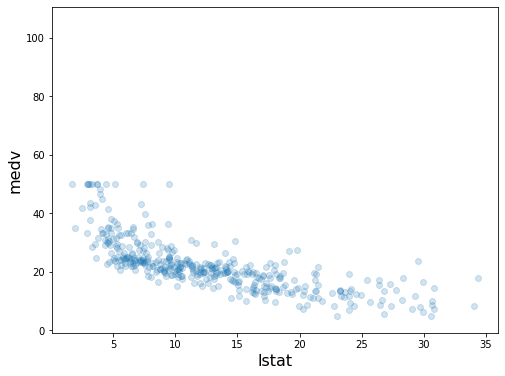

In [102]:
#x = np.arange(df_house.lstat.min(), df_house.lstat.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(res_4_model.shape[0]):
    
    y = get_y(res_4_model.coef_lstat[i], res_4_model.intercept[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y_1 = get_y(ols_dic['a'], ols_dic['b'])

ax.plot(x,y_1, color='red', label='OLS')
ax.scatter(house_x.lstat, house_y.medv, alpha=.2)
ax.set_xlabel('lstat', fontsize=16)
ax.set_ylabel('medv', fontsize=16)

In [103]:
ax.scatter(house_x.lstat, house_y.medv, alpha=.2)

In [104]:
res_4_model.intercept

0    24.13672
1    17.95401
2    61.32206
3    18.60626
Name: intercept, dtype: float64

In [105]:
model_col = res_4_model.columns[2:].to_list()
model_col 

['coef_crim',
 'coef_zn',
 'coef_indus',
 'coef_chas',
 'coef_nox',
 'coef_rm',
 'coef_age',
 'coef_dis',
 'coef_rad',
 'coef_tax',
 'coef_ptratio',
 'coef_black',
 'coef_lstat',
 'lb_crim',
 'lb_zn',
 'lb_indus',
 'lb_chas',
 'lb_nox',
 'lb_rm',
 'lb_age',
 'lb_dis',
 'lb_rad',
 'lb_tax',
 'lb_ptratio',
 'lb_black',
 'lb_lstat',
 'ub_crim',
 'ub_zn',
 'ub_indus',
 'ub_chas',
 'ub_nox',
 'ub_rm',
 'ub_age',
 'ub_dis',
 'ub_rad',
 'ub_tax',
 'ub_ptratio',
 'ub_black',
 'ub_lstat']

<Figure size 720x432 with 0 Axes>

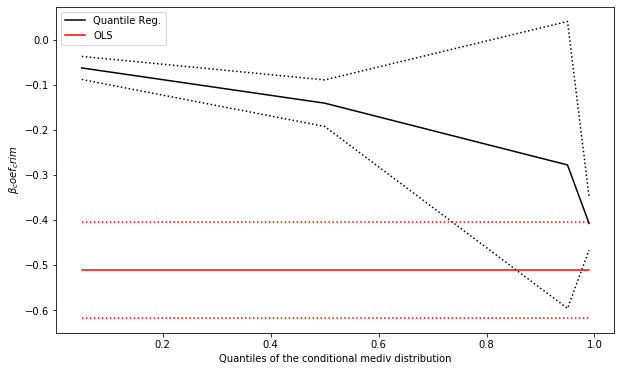

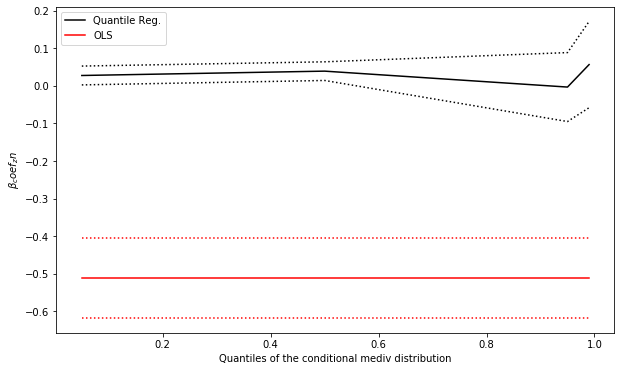

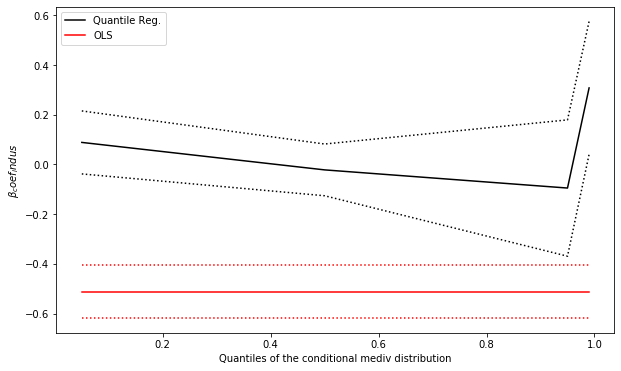

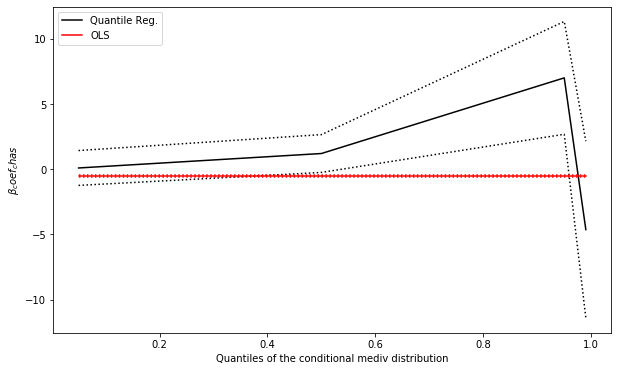

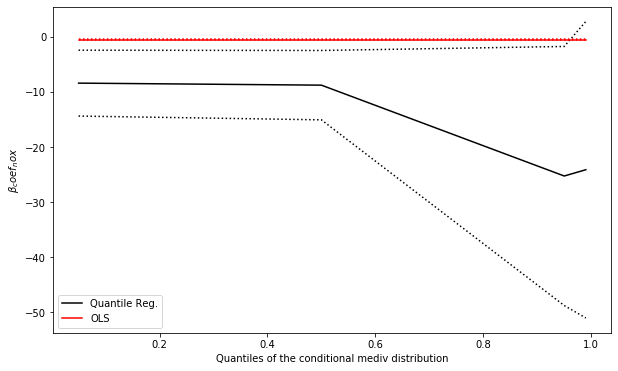

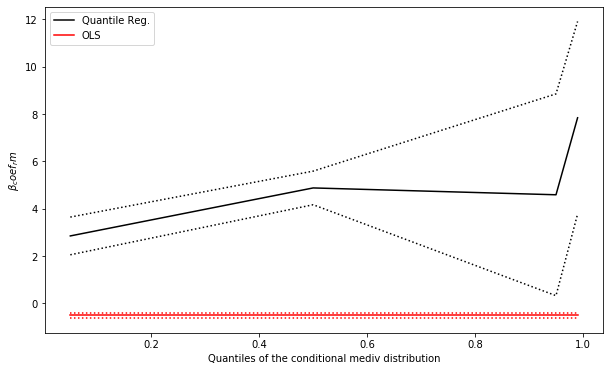

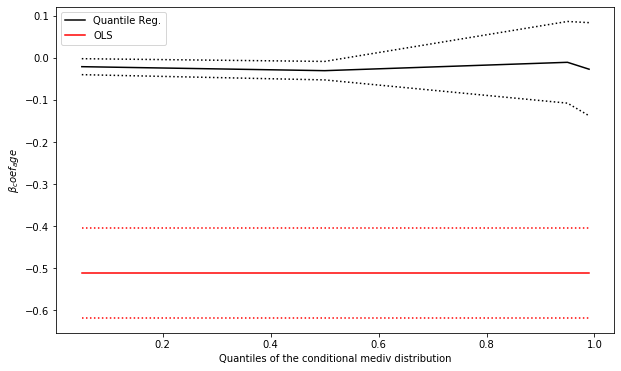

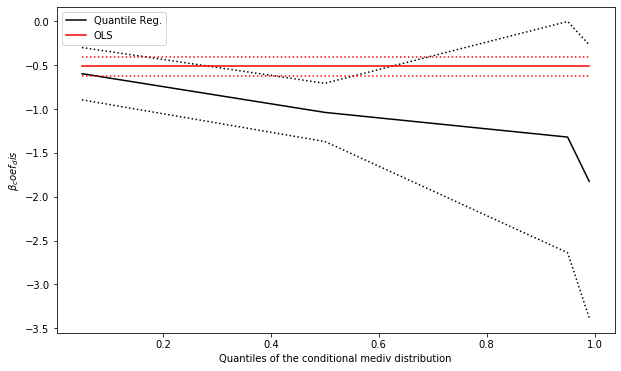

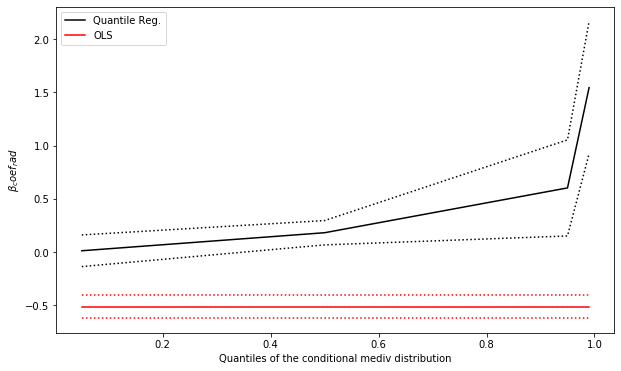

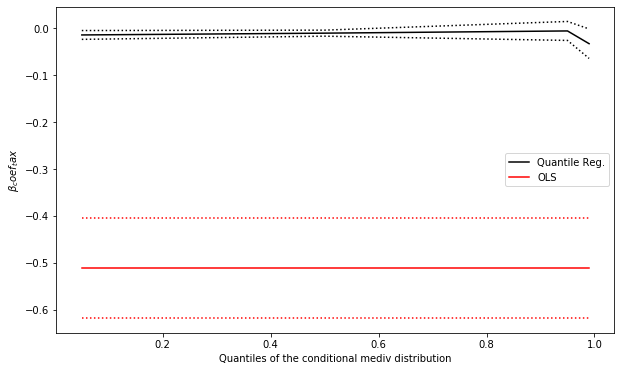

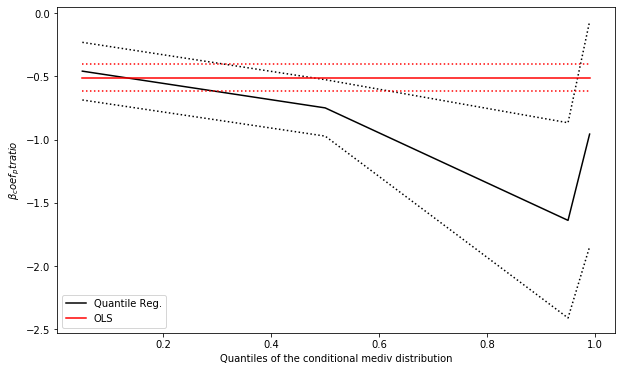

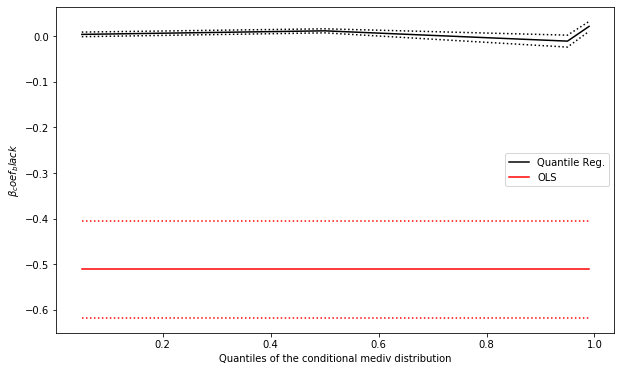

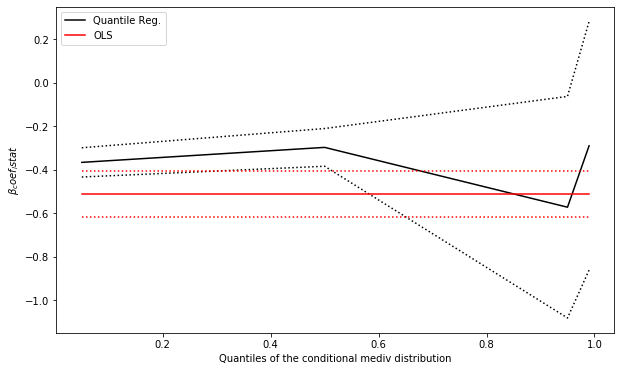

IndexError: list index out of range

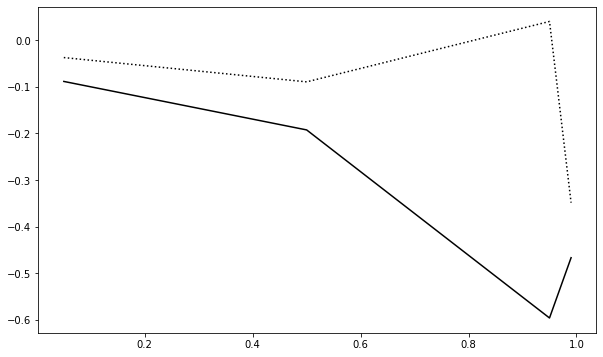

In [208]:
plt.figure(figsize = (10,6))
n = res_4_model.shape[0]

for i in range(0,14) :
    plt.figure(figsize = (10,6))
    p1 = plt.plot(res_4_model.q,res_4_model[model_col[i]], color='black', label='Quantile Reg.')
    p2 = plt.plot(res_4_model.q, res_4_model[model_col[i+13]], linestyle='dotted', color='black')
    p3 = plt.plot(res_4_model.q, res_4_model[model_col[i+26]], linestyle='dotted', color='black')
    p4 = plt.plot(res_4_model.q, [ols_dic['b']] * n, color='red', label='OLS')
    p5 = plt.plot(res_4_model.q, [ols_dic['lb']] * n, linestyle='dotted', color='red')
    p6 = plt.plot(res_4_model.q, [ols_dic['ub']] * n, linestyle='dotted', color='red')
    plt.ylabel(r'$\beta_{}$'.format(model_col[i]))
    plt.xlabel('Quantiles of the conditional mediv distribution')
    plt.legend()
    plt.show()

In [ ]:
import this